In [246]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [247]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    SIZE_TICKS = 10

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_xlabel(xname, fontsize=15)
    ax.xaxis.set_label_coords(0.98, 0.05)

    ax.set_ylabel(yname, rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.025, 0.95)

    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [248]:
data_ = np.array([
    -10.038, -5.731, -3.571, -4.769, -2.148, -5.876, -2.890, -5.026, -6.664, -6.096,
    0.547, -6.359, -8.738, -3.841, -3.484, -5.938, -4.247, -7.160, -2.433, -3.900,
    -1.690, -0.590, -3.802, -4.190, -1.819, -2.458, 1.452, -3.434, -5.249, -2.010,
    -4.633, -3.080, -8.746, -5.190, -3.556, -2.031, -4.076, -2.690, -4.211, -2.686,
    -3.498, -2.744, -3.635, -6.060, -4.377, -3.914, -2.641, -5.916, -4.041, -2.953,
    -6.094, -6.146, -2.992, -4.370, -0.334, -6.045, -2.156, -5.746, -2.191, -6.026,
    -2.762, -5.168, -3.052, -2.823, -6.320, -2.055, -3.915, -4.372, -0.723, -3.751,
    -4.142, -1.953, -4.221, 0.238, -2.718, -5.712, -2.016, -3.995, -7.838, -3.634,
    -3.843, -1.986, -3.188, -1.993, -6.454, -4.969, -5.130, -6.158, -2.055, -3.492,
    -5.332, -9.888, -2.272, -5.609, -3.733, -6.413, -2.637, -3.782, -4.319, -2.973,
    -4.319, -3.607, -3.343, -3.979, -2.975, -5.756, -5.843, -4.214, -6.592, -6.628,
    -1.026, -1.497, -5.495, -4.451, -3.347, -4.243, -3.505, -1.886, -3.364, -3.669
])

data_

array([-10.038,  -5.731,  -3.571,  -4.769,  -2.148,  -5.876,  -2.89 ,
        -5.026,  -6.664,  -6.096,   0.547,  -6.359,  -8.738,  -3.841,
        -3.484,  -5.938,  -4.247,  -7.16 ,  -2.433,  -3.9  ,  -1.69 ,
        -0.59 ,  -3.802,  -4.19 ,  -1.819,  -2.458,   1.452,  -3.434,
        -5.249,  -2.01 ,  -4.633,  -3.08 ,  -8.746,  -5.19 ,  -3.556,
        -2.031,  -4.076,  -2.69 ,  -4.211,  -2.686,  -3.498,  -2.744,
        -3.635,  -6.06 ,  -4.377,  -3.914,  -2.641,  -5.916,  -4.041,
        -2.953,  -6.094,  -6.146,  -2.992,  -4.37 ,  -0.334,  -6.045,
        -2.156,  -5.746,  -2.191,  -6.026,  -2.762,  -5.168,  -3.052,
        -2.823,  -6.32 ,  -2.055,  -3.915,  -4.372,  -0.723,  -3.751,
        -4.142,  -1.953,  -4.221,   0.238,  -2.718,  -5.712,  -2.016,
        -3.995,  -7.838,  -3.634,  -3.843,  -1.986,  -3.188,  -1.993,
        -6.454,  -4.969,  -5.13 ,  -6.158,  -2.055,  -3.492,  -5.332,
        -9.888,  -2.272,  -5.609,  -3.733,  -6.413,  -2.637,  -3.782,
        -4.319,  -2.

In [249]:
def group(data):
    n_ = len(data)
    print(f'n: {n_}')

    min_ = min(data)
    max_ = max(data)
    print(f'min: {min_}     max: {max_}')

    range_ = max_ - min_
    print(f'range: {range_}')

    l_ = 1 + int(np.log2(n_))
    print(f'l: {l_}')

    h_ = range_ / l_
    print(f'h: {h_}')

    int_boundaries_ = np.array(
        [min_ + i * h_ for i in range(0, l_ + 1, 1)]
    )
    print(f'interval boundaries: {int_boundaries_}')
    intervals_ = np.array(
        [(int_boundaries_[i], int_boundaries_[i+1]) for i in range(0, l_, 1)]
    )
    print(f'intervals: {intervals_}')
    mid_ranges_ = np.array(
        [sum(interval)/2 for interval in intervals_]
    )
    print(f'intervals\' midpoints: {mid_ranges_}')

    present = lambda el, int_ : int_[0] <= el < int_[1]
    freqs_ = np.zeros(l_)
    for el in data:
        for j in range(0, l_, 1):
            if present(el, intervals_[j]):
                freqs_[j] += 1 

    freqs_[-1] += np.count_nonzero(data == max_)
    print(f'frequencies: {freqs_}')


    rel_freqs_ = freqs_ / n_
    print(f'relative frequencies: {rel_freqs_}')

    assert np.sum(rel_freqs_) == 1

    rel_freqs_density_ = rel_freqs_ / h_
    print(f'relative frequencies\' density: {rel_freqs_density_}')

    print(f'-'*100)

    space_ = ' ' * 5
    for i in range(l_):
        print(f'{intervals_[i]}{space_}{freqs_[i]}{space_}{rel_freqs_[i]}{space_}{rel_freqs_density_[i]}')
    
    return n_, min_, max_, h_, int_boundaries_, mid_ranges_, rel_freqs_density_

n_, min_, max_, h_, int_boundaries_, mid_ranges_, rel_freqs_density_ = group(data_)

n: 120
min: -10.038     max: 1.452
range: 11.49
l: 7
h: 1.6414285714285715
interval boundaries: [-10.038       -8.39657143  -6.75514286  -5.11371429  -3.47228571
  -1.83085714  -0.18942857   1.452     ]
intervals: [[-10.038       -8.39657143]
 [ -8.39657143  -6.75514286]
 [ -6.75514286  -5.11371429]
 [ -5.11371429  -3.47228571]
 [ -3.47228571  -1.83085714]
 [ -1.83085714  -0.18942857]
 [ -0.18942857   1.452     ]]
intervals' midpoints: [-9.21728571 -7.57585714 -5.93442857 -4.293      -2.65157143 -1.01014286
  0.63128571]
frequencies: [ 4.  2. 29. 40. 35.  7.  3.]
relative frequencies: [0.03333333 0.01666667 0.24166667 0.33333333 0.29166667 0.05833333
 0.025     ]
relative frequencies' density: [0.02030751 0.01015376 0.14722947 0.20307514 0.17769075 0.03553815
 0.01523064]
----------------------------------------------------------------------------------------------------
[-10.038       -8.39657143]     4.0     0.03333333333333333     0.020307513780098634
[-8.39657143 -6.75514286]     2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


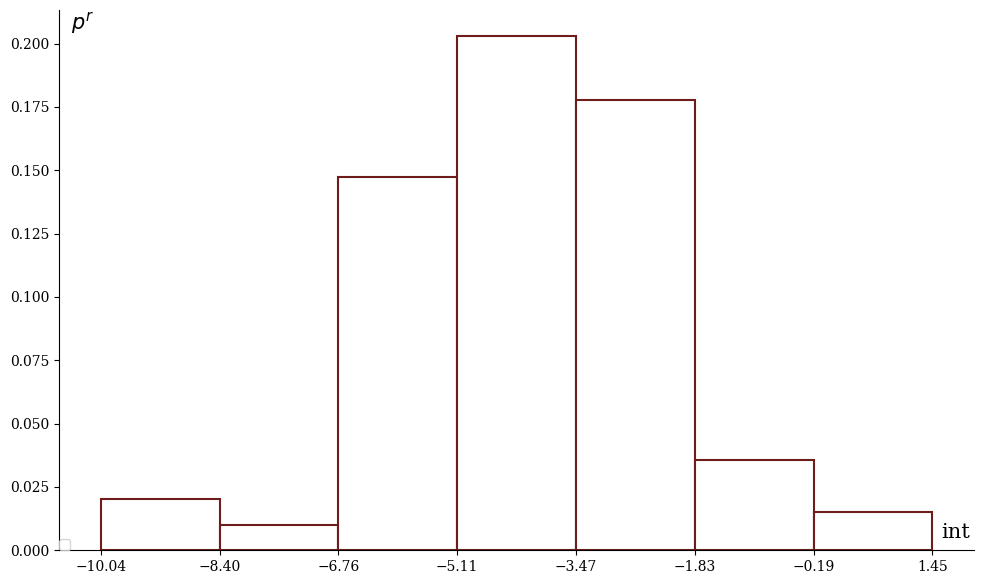

In [250]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))

    x_values = mid_ranges_
    y_values = rel_freqs_density_

    ax.bar(x_values, y_values, width=h_, color='white', edgecolor=RED, linestyle='-', linewidth=1.5, align='center')
    
    decorate_plot(ax, int_boundaries_, 'int', '$p^r$', loc=(0, 0))

    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('hist')

In [251]:
overlineX = 1/n_ * sum(data_)
print(f'mean: {overlineX}')

S2 = 1/(n_ - 1) * sum((data_ - overlineX)**2)
print(f'variance: {S2}')

mean: -4.015225000000001
variance: 3.9155142430672245


In [252]:
alpha = 0.05
a0 = -3.5
sigma0 = 2
a1 = -4
sigma1 = 2
epsilon = 0.1

check = lambda cond : 'accept' if not cond else 'decline'

In [253]:
quantile = sp.stats.t.ppf(alpha, n_-1)

C2 = np.sqrt(S2)*quantile/np.sqrt(n_) + a0
print(f'C2 = {C2}, overlineX < C2 = {overlineX < C2} => {check(overlineX < C2)}')

C2 = -3.7994506430588832, overlineX < C2 = True => decline


In [254]:
quantile = sp.stats.chi2.ppf(alpha, n_-1)

C3 = quantile * sigma0**2 / (n_ - 1)
print(f'C3 = {C3}, S2 < C3 = {S2 < C3} => {check(S2 < C3)}')

C3 = 3.1869323340943887, S2 < C3 = False => accept


In [255]:
quantile = sp.stats.norm.ppf(alpha, 0, 1)

C1 = quantile * sigma1 / np.sqrt(n_) + a0
print(f'C1 = {C1}, overlineX < C1 = {overlineX < C1} => {check(overlineX < C1)}')

C1 = -3.800307811758503, overlineX < C1 = True => decline


In [ ]:
val = (C1 - a1)/sigma1 * np.sqrt(n_)

beta = 1 - sp.stats.norm.cdf(val, 0, 1)
print(f'beta = {beta}')

0.13703030993578524

In [ ]:
quantile = sp.stats.norm.ppf(1 - epsilon, 0, 1)

a1_ = -quantile * sigma1 / np.sqrt(n_) + C1
print(f'a1\' = {a1_}')

-4.034286045443449

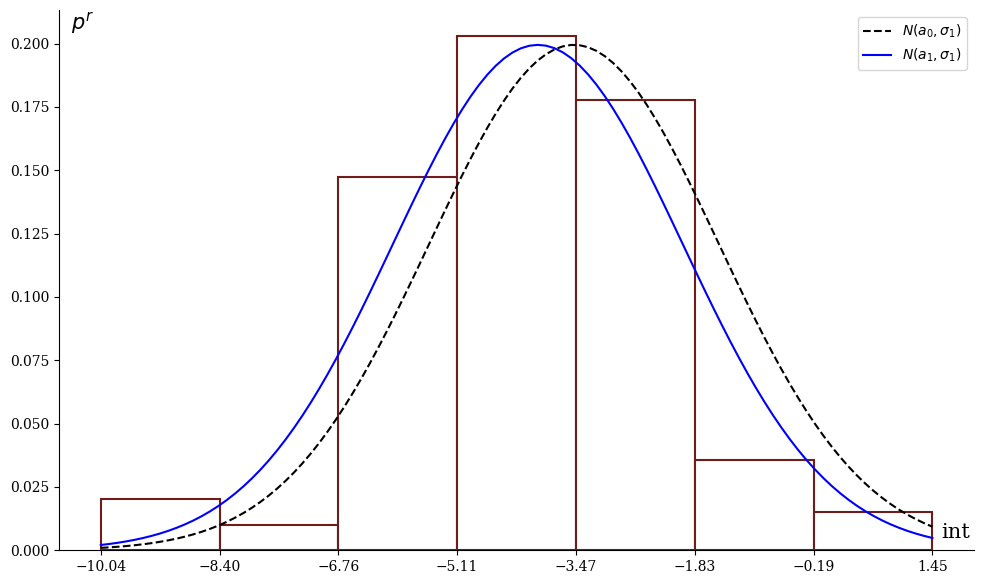

In [258]:
def buildBar(filename):
    RED = '#6F1D1B'

    _, ax = plt.subplots(figsize=(10, 6))

    x_values = mid_ranges_
    y_values = rel_freqs_density_

    # hist
    ax.bar(x_values, y_values, width=h_, color='white', edgecolor=RED, linestyle='-', linewidth=1.5, align='center')
    
    x_values = np.linspace(min_, max_, 100)

    # norm pdf with a0 sigma1
    y_values = sp.stats.norm.pdf(x_values, a0, sigma1)
    ax.plot(x_values, y_values, color='black', linestyle='--', linewidth=1.5, label='$N(a_0, \\sigma_1)$')

    # norm pdf with a1 sigma1
    y_values = sp.stats.norm.pdf(x_values, a1, sigma1)
    ax.plot(x_values, y_values, color='blue', linestyle='-', linewidth=1.5, label='$N(a_1, \\sigma_1)$')

    decorate_plot(ax, int_boundaries_, 'int', '$p^r$', loc='best')

    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    plt.show()

buildBar('hist_pdf1_pdf2')